In [2]:
import operator
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.core.pylabtools import figsize 
%matplotlib inline

In [3]:
hum = pd.read_csv("data/humsavar_gt.tab.gz", sep="\t")
hum.rename(columns={"Type of variant HumsaVar": "TYPE"}, inplace=True)
hum["MUTANT"] = hum.MUTANT.str.rstrip()
hum.drop_duplicates(inplace=True)
hum.drop_duplicates(subset="MUTANT", keep=False, inplace=True)

In [4]:
hum.TYPE.value_counts()

Disease         4657
Polymorphism    1983
Unclassified     601
Name: TYPE, dtype: int64

In [5]:
hum.head()

,MUTANT,3DID,ACTIVE_SITE,AGGREGABILITY,BFACTOR,CONSERVATION,PDB,SASA,SASA_PERCENTAGE,SWITCHBILITY,VARIATION_ENERGY,TYPE
0,P11362-174-V-A,False,NaN,0.0,32.280,NaN,False,6.038,0.03,NaN,2.699420,Disease
1,Q8WZA1-504-V-I,False,NaN,NaN,67.465,NaN,False,90.814,0.51,0.0000,-0.341963,Polymorphism
2,P46100-243-C-F,False,BINDING,NaN,0.000,NaN,False,1.143,0.00,0.0661,26.057600,Disease
3,P11473-362-T-I,False,NaN,NaN,11.290,NaN,False,0.214,0.00,0.0000,-0.832075,Polymorphism
4,Q9NXN4-106-G-S,True,NaN,0.0,37.430,0.24,False,0.000,0.00,0.0410,2.827400,Polymorphism


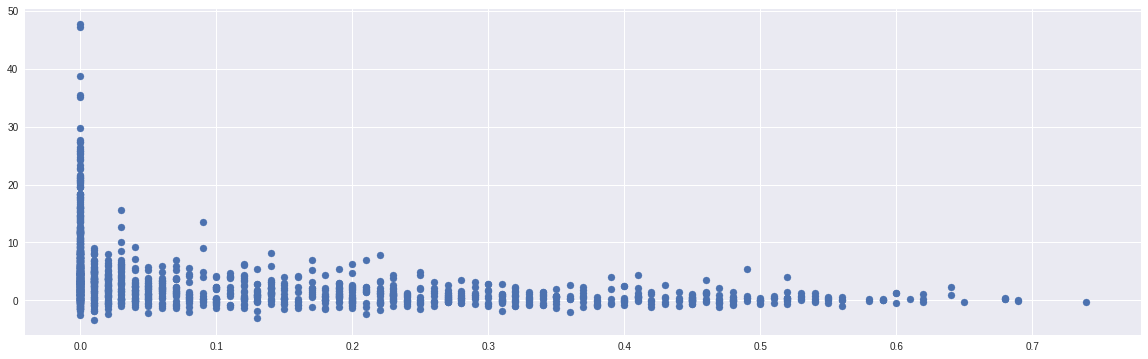

In [8]:
figsize(20,6)
hum_3DID = hum[hum["3DID"]]
plt.scatter(hum_3DID.SASA_PERCENTAGE, hum_3DID.VARIATION_ENERGY)

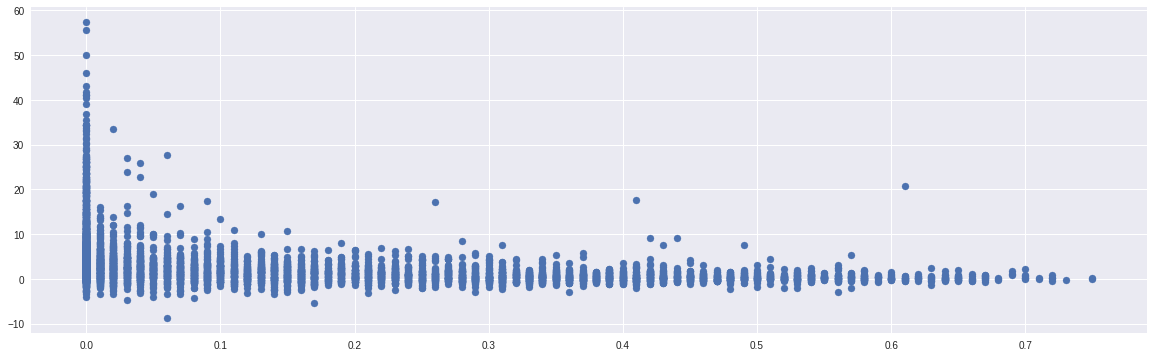

In [9]:
figsize(20,6)
hum_3DID = hum[~hum["3DID"]]
plt.scatter(hum_3DID.SASA_PERCENTAGE, hum_3DID.VARIATION_ENERGY)

In [46]:
hum[["3DID", "TYPE", "VARIATION_ENERGY", "SASA_PERCENTAGE"]].pivot_table(index=["TYPE", "3DID"], aggfunc=[np.mean, np.median, np.std])

mean                           median  \
                   SASA_PERCENTAGE VARIATION_ENERGY SASA_PERCENTAGE   
TYPE         3DID                                                     
Disease      False        0.125792         3.529743            0.05   
             True         0.092058         4.096743            0.02   
Polymorphism False        0.234715         1.177018            0.21   
             True         0.207222         1.314659            0.17   
Unclassified False        0.196717         2.193229            0.15   
             True         0.145854         2.323052            0.05   

                                                std                   
                   VARIATION_ENERGY SASA_PERCENTAGE VARIATION_ENERGY  
TYPE         3DID                                                     
Disease      False         2.118790        0.162016         5.389290  
             True          2.569405        0.141247         5.543844  
Polymorphism False         0.594525        0.194968         2.536349  
             True          0.736030        0.191711         3.183989  
Unclassified False         0.966507        0.191875         4.059156  
             True          0.943651        0.176054         4.665494